In [1]:
!pip3 install numpy pandas scikit-learn matplotlib seaborn xgboost lightgbm tensorflow optuna scipy statsmodels openpyxl pandas-profiling imbalanced-learn plotly yellowbrick jupyter tqdm category_encoders

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/fe/df/e3a1f3f008db8d2b199ded2168014c7784b8027714b74d802c892815fd72/xgboost-2.1.2-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/e8/30/35111dae435c640694d616a611b7ff6b2482cfd977f8f572ff960a321d66/optuna-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for pandas-profiling from https://files.pythonhosted.org/packages/57/b7/e13216265ae3135ecda13e966aad9ce04b7e7b3e2d87d056b032fc9f457c/pandas_profiling-3.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/98/47/598b4bf0ccf6f02915e71bdd23fe846a27adc2d3ba734f2ba5215d8e44f5/cat

In [2]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer

In [4]:
# Feature selection and engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from scipy import stats

In [5]:
# Models
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import optuna

In [7]:
# Visualization settings
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style using seaborn
sns.set_style("whitegrid")  # or "darkgrid", "white", "dark", "ticks"
sns.set_context("notebook")  # or "paper", "talk", "poster"
sns.set_palette("husl")

# Additional matplotlib settings for better visualizations
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# If you want to use a specific color palette, you can choose from:
# "deep", "muted", "pastel", "bright", "dark", "colorblind"
# Example:
# sns.set_palette("deep")

# To see available matplotlib styles:
print("Available matplotlib styles:", plt.style.available)

# To see available seaborn palettes:
print("\nAvailable seaborn color palettes:")
print([p for p in dir(sns.color_palette()) if not p.startswith('_')])

Available matplotlib styles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

Available seaborn color palettes:
['append', 'as_hex', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


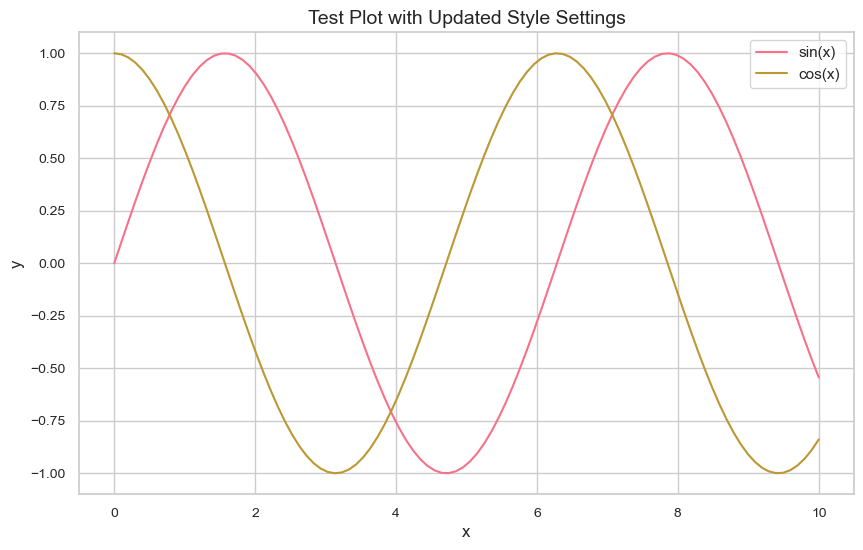

In [8]:
# Test plot to verify visualization settings
import numpy as np

# Generate sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create test plot
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='cos(x)')
plt.title('Test Plot with Updated Style Settings')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# This plot is a way to check that everything looks right before using these settings on more important data. 
# It shows how different lines, labels, and grid lines look. The sine and cosine curves are just for testing, 
# to make sure the plot style is clear and easy to read.

In [9]:
# 2. Data Loading and Initial Exploration
def load_data(file_path_2009, file_path_2010):
    """
    Load and combine data from both Excel files
    """
    print("Loading datasets...")
    df_2009 = pd.read_excel(file_path_2009)
    df_2010 = pd.read_excel(file_path_2010)
    
    # Combine datasets
    df = pd.concat([df_2009, df_2010], axis=0, ignore_index=True)
    print(f"Total records loaded: {len(df)}")
    
    return df

def initial_exploration(df):
    """
    Perform initial data exploration
    """
    print("\n=== Dataset Overview ===")
    print("\nFirst few rows:")
    display(df.head())
    
    print("\nDataset Info:")
    display(df.info())
    
    print("\nBasic Statistics:")
    display(df.describe())
    
    print("\nMissing Values:")
    display(df.isnull().sum())
    
    return df

In [10]:
# 3. Data Preprocessing and Feature Engineering
# Set random seed for reproducibility
np.random.seed(42)

def load_data(file_path, sheet_names):
    """
    Load and combine data from Excel sheets
    """
    print("Loading datasets...")
    
    # Initialize empty list to store dataframes
    dfs = []
    
    # Read each sheet and append to list
    for sheet in sheet_names:
        try:
            df = pd.read_excel(file_path, sheet_name=sheet)
            dfs.append(df)
            print(f"Successfully loaded sheet: {sheet}")
        except Exception as e:
            print(f"Error loading sheet {sheet}: {str(e)}")
    
    # Combine all dataframes
    if dfs:
        df = pd.concat(dfs, axis=0, ignore_index=True)
        print(f"Total records loaded: {len(df)}")
        return df
    else:
        raise ValueError("No data was loaded from the Excel file")

def initial_exploration(df):
    """
    Perform initial data exploration
    """
    print("\n=== Dataset Overview ===")
    print("\nFirst few rows:")
    print(df.head())
    
    print("\nDataset Info:")
    print(df.info())
    
    print("\nBasic Statistics:")
    print(df.describe())
    
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    return df

def preprocess_data(df):
    """
    Comprehensive data preprocessing and feature engineering
    """
    print("Starting data preprocessing...")
    
    # Create a copy of the dataframe
    df = df.copy()
    
    # Rename the Customer ID column if it has a space
    if 'Customer ID' in df.columns:
        df = df.rename(columns={'Customer ID': 'CustomerID'})
    
    # 3.1 Basic Cleaning
    # Remove duplicates
    df = df.drop_duplicates()
    
    # Handle missing values
    df = df.dropna(subset=['CustomerID'])  # Remove rows without CustomerID
    
    # Remove invalid entries
    df = df[df['Quantity'] > 0]
    df = df[df['Price'] > 0]
    
    # 3.2 Date Processing
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    
    # 3.3 Feature Engineering
    # Basic features
    df['Total_Amount'] = df['Quantity'] * df['Price']
    df['Hour'] = df['InvoiceDate'].dt.hour
    df['Day_of_Week'] = df['InvoiceDate'].dt.dayofweek
    df['Month'] = df['InvoiceDate'].dt.month
    df['Year'] = df['InvoiceDate'].dt.year
    df['Is_Weekend'] = df['Day_of_Week'].isin([5, 6]).astype(int)
    
    # 3.4 RFM Analysis
    current_date = df['InvoiceDate'].max()
    
    # Print debug information
    print("\nDebug Info:")
    print(f"Number of unique customers: {df['CustomerID'].nunique()}")
    print(f"Date range: from {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
    
    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (current_date - x.max()).days,  # Recency
        'Invoice': 'count',  # Frequency
        'Total_Amount': 'sum'  # Monetary
    })
    
    rfm.columns = ['Recency', 'Frequency', 'Monetary']
    
    # 3.5 Advanced Customer Metrics
    customer_metrics = df.groupby('CustomerID').agg({
        'Quantity': ['count', 'mean', 'std', 'min', 'max'],
        'Price': ['mean', 'std', 'min', 'max'],
        'Total_Amount': ['mean', 'std', 'min', 'max'],
        'Hour': ['mean', 'std'],
        'Is_Weekend': 'mean'
    }).fillna(0)
    
    # Flatten column names
    customer_metrics.columns = [f'{x[0]}_{x[1]}' for x in customer_metrics.columns]
    
    # 3.6 Time-based Features
    def calculate_purchase_intervals(customer_id):
        # Get all purchase dates for this customer
        dates = sorted(df[df['CustomerID'] == customer_id]['InvoiceDate'])
        if len(dates) < 2:
            return 0, 0
        # Calculate intervals in days
        intervals = [(dates[i+1] - dates[i]).days for i in range(len(dates)-1)]
        return np.mean(intervals), np.std(intervals) if len(intervals) > 1 else 0
    
    # Calculate purchase intervals for each customer
    purchase_intervals = []
    unique_customers = df['CustomerID'].unique()
    
    for customer in unique_customers:
        mean_interval, std_interval = calculate_purchase_intervals(customer)
        purchase_intervals.append([mean_interval, std_interval])
    
    purchase_intervals_df = pd.DataFrame(
        purchase_intervals, 
        index=unique_customers,
        columns=['Avg_Purchase_Interval', 'Std_Purchase_Interval']
    )
    
    # 3.7 Combine Features
    final_features = pd.merge(rfm, customer_metrics, 
                            left_index=True, right_index=True, 
                            how='left')
    final_features = pd.merge(final_features, purchase_intervals_df,
                            left_index=True, right_index=True,
                            how='left')
    
    # 3.8 Handle Outliers
    def handle_outliers(df, columns, n_std=3):
        for column in columns:
            mean = df[column].mean()
            std = df[column].std()
            df[column] = df[column].clip(lower=mean - n_std * std, 
                                       upper=mean + n_std * std)
        return df
    
    numerical_columns = final_features.select_dtypes(include=['float64', 'int64']).columns
    final_features = handle_outliers(final_features, numerical_columns)
    
    print("Preprocessing completed. Final feature shape:", final_features.shape)
    
    # Print summary of final features
    print("\nSummary of final features:")
    print(final_features.describe())
    
    return final_features

In [11]:
# 4. Data Splitting and Feature Scaling
def split_and_scale_data(X, y, test_size=0.2, valid_size=0.1, random_state=42):
    """
    Split data into train, validation, test sets and scale features
    """
    # First split: separate test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Second split: create validation set
    valid_ratio = valid_size / (1 - test_size)
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_temp, y_temp, test_size=valid_ratio, random_state=random_state
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    X_test_scaled = scaler.transform(X_test)
    
    print("Data split and scaling complete:")
    print(f"Training set: {X_train_scaled.shape}")
    print(f"Validation set: {X_valid_scaled.shape}")
    print(f"Test set: {X_test_scaled.shape}")
    
    return (X_train_scaled, X_valid_scaled, X_test_scaled, 
            y_train, y_valid, y_test, scaler)

In [12]:
# 5. Model Development
class CustomerValuePredictor:
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.xgb_model = None
        self.nn_model = None
        self.scaler = None
        self.feature_names = None
    
    def _optimize_xgboost(self, trial, X_train, X_valid, y_train, y_valid):
        """
        Optimize XGBoost hyperparameters using Optuna
        """
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'max_depth': trial.suggest_int('max_depth', 4, 12),
            'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
            'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
            'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True)
        }
        
        model = XGBRegressor(**param, random_state=self.random_state)
        model.fit(
            X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            verbose=False
        )
        
        preds = model.predict(X_valid)
        rmse = np.sqrt(mean_squared_error(y_valid, preds))
        return -rmse
    
    def _create_neural_network(self, input_dim):
        """
        Create neural network architecture
        """
        model = Sequential([
            Dense(128, activation='relu', input_dim=input_dim),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),
            
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.1),
            
            Dense(1)
        ])
        
        model.compile(
            optimizer='adam',
            loss='mse',
            metrics=['mae']
        )
        
        return model
    
    def train(self, X_train, X_valid, y_train, y_valid, n_trials=100):
        """
        Train both XGBoost and Neural Network models
        """
        # Train XGBoost
        print("\nTraining XGBoost model...")
        study = optuna.create_study(direction='maximize')
        study.optimize(
            lambda trial: self._optimize_xgboost(
                trial, X_train, X_valid, y_train, y_valid
            ),
            n_trials=n_trials
        )
        
        best_params = study.best_params
        self.xgb_model = XGBRegressor(**best_params, random_state=self.random_state)
        self.xgb_model.fit(
            X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            verbose=False
        )
        
        # Train Neural Network
        print("\nTraining Neural Network...")
        self.nn_model = self._create_neural_network(X_train.shape[1])
        
        early_stopping = EarlyStopping(
            monitor='val_loss',
            patience=20,
            restore_best_weights=True
        )
        
        self.nn_history = self.nn_model.fit(
            X_train, y_train,
            validation_data=(X_valid, y_valid),
            epochs=100,
            batch_size=32,
            callbacks=[early_stopping],
            verbose=1
        )
    
    def evaluate(self, X_test, y_test):
        """
        Evaluate both models
        """
        results = {}
        
        # XGBoost evaluation
        xgb_preds = self.xgb_model.predict(X_test)
        results['XGBoost'] = {
            'mse': mean_squared_error(y_test, xgb_preds),
            'rmse': np.sqrt(mean_squared_error(y_test, xgb_preds)),
            'mae': mean_absolute_error(y_test, xgb_preds),
            'r2': r2_score(y_test, xgb_preds)
        }
        
        # Neural Network evaluation
        nn_preds = self.nn_model.predict(X_test)
        results['Neural Network'] = {
            'mse': mean_squared_error(y_test, nn_preds),
            'rmse': np.sqrt(mean_squared_error(y_test, nn_preds)),
            'mae': mean_absolute_error(y_test, nn_preds),
            'r2': r2_score(y_test, nn_preds)
        }
        
        return results
    
    def plot_results(self, X_test, y_test):
        """
        Create visualizations of model performance
        """
        # Feature importance for XGBoost
        if hasattr(self.xgb_model, 'feature_importances_'):
            plt.figure(figsize=(12, 6))
            plt.title('XGBoost Feature Importance')
            plt.bar(range(len(self.xgb_model.feature_importances_)), 
                   self.xgb_model.feature_importances_)
            plt.xticks(range(len(self.feature_names)), 
                      self.feature_names, rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        
        # Learning curves for Neural Network
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(self.nn_history.history['loss'], label='Training Loss')
        plt.plot(self.nn_history.history['val_loss'], label='Validation Loss')
        plt.title('Neural Network Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(self.nn_history.history['mae'], label='Training MAE')
        plt.plot(self.nn_history.history['val_mae'], label='Validation MAE')
        plt.title('Neural Network MAE')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()
        plt.tight_layout()
        plt.show()

In [ ]:
if __name__ == "__main__":
    try:
        print("Starting model training and evaluation...")

        # 1. Load and preprocess data
        file_path = "online_retail_II.xlsx"
        sheet_names = ["Year 2009-2010", "Year 2010-2011"]
        
        df = load_data(file_path, sheet_names)
        df = initial_exploration(df)
        final_features = preprocess_data(df)
        
        # 2. Define features (X) and target (y)
        # Replace 'Monetary' with your actual target column name if different
        X = final_features.drop(columns=['Monetary'])
        y = final_features['Monetary']
        
        # 3. Split and scale data
        X_train, X_valid, X_test, y_train, y_valid, y_test, scaler = split_and_scale_data(X, y)

        # 4. Initialize and train models
        predictor = CustomerValuePredictor()
        predictor.feature_names = X.columns
        predictor.train(X_train, X_valid, y_train, y_valid)
        
        # 5. Evaluate models
        results = predictor.evaluate(X_test, y_test)
        
        # 6. Print results
        print("\nModel Evaluation Results:")
        for model_name, metrics in results.items():
            print(f"\n{model_name}:")
            for metric_name, value in metrics.items():
                print(f"{metric_name}: {value:.4f}")
        
        # 7. Plot results
        predictor.plot_results(X_test, y_test)
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        raise

Starting model training and evaluation...
Loading datasets...
Successfully loaded sheet: Year 2009-2010
Successfully loaded sheet: Year 2010-2011
Total records loaded: 1067371

=== Dataset Overview ===

First few rows:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


[I 2024-11-15 00:27:12,416] A new study created in memory with name: no-name-0a0167e3-7976-4a92-b808-6e811af4737e


Preprocessing completed. Final feature shape: (5878, 21)

Summary of final features:
           Recency    Frequency      Monetary  Quantity_count  Quantity_mean  \
count  5878.000000  5878.000000   5878.000000     5878.000000    5878.000000   
mean    200.331916   121.400791   2434.174701      121.400791      19.506979   
std     209.338707   186.727219   5206.255404      186.727219      68.112291   
min       0.000000     1.000000      2.950000        1.000000       1.000000   
25%      25.000000    20.000000    342.280000       20.000000       5.649639   
50%      95.000000    52.000000    867.740000       52.000000       9.603727   
75%     379.000000   138.000000   2248.305000      138.000000      14.178030   
max     738.000000  1159.170651  46278.462159     1159.170651    1120.514659   

       Quantity_std  Quantity_min  Quantity_max   Price_mean    Price_std  \
count   5878.000000   5878.000000   5878.000000  5878.000000  5878.000000   
mean      17.393278      4.035536     92

[I 2024-11-15 00:27:19,083] Trial 0 finished with value: -1002.0443258023823 and parameters: {'n_estimators': 612, 'max_depth': 8, 'learning_rate': 0.012832378418272119, 'subsample': 0.8060823931854322, 'colsample_bytree': 0.6553616608631888, 'min_child_weight': 3, 'gamma': 8.419036171800762e-08, 'reg_alpha': 0.0046463586914504106, 'reg_lambda': 4.7432565418602376e-05}. Best is trial 0 with value: -1002.0443258023823.
[I 2024-11-15 00:27:22,965] Trial 1 finished with value: -1056.1519883592055 and parameters: {'n_estimators': 511, 'max_depth': 6, 'learning_rate': 0.07956794298376402, 'subsample': 0.8744302322361746, 'colsample_bytree': 0.7774548810386086, 'min_child_weight': 6, 'gamma': 1.1969111285708814e-08, 'reg_alpha': 1.5755759754909163e-07, 'reg_lambda': 0.45336033469110193}. Best is trial 0 with value: -1002.0443258023823.
[I 2024-11-15 00:27:28,902] Trial 2 finished with value: -1296.5854285089606 and parameters: {'n_estimators': 556, 'max_depth': 7, 'learning_rate': 0.03305886

[I 2024-11-15 09:14:46,433] Trial 20 finished with value: -948.2235659322852 and parameters: {'n_estimators': 939, 'max_depth': 11, 'learning_rate': 0.02090184797210727, 'subsample': 0.7533429574630047, 'colsample_bytree': 0.8071672956932021, 'min_child_weight': 6, 'gamma': 6.960568017161685e-05, 'reg_alpha': 1.5899007446070318e-06, 'reg_lambda': 1.0523280819904167e-08}. Best is trial 20 with value: -948.2235659322852.
[I 2024-11-15 09:15:02,672] Trial 21 finished with value: -980.7496156239359 and parameters: {'n_estimators': 992, 'max_depth': 11, 'learning_rate': 0.02416126057572765, 'subsample': 0.7545638296766746, 'colsample_bytree': 0.8715927125414682, 'min_child_weight': 7, 'gamma': 4.288403777464537e-05, 'reg_alpha': 1.7050374030501232e-06, 'reg_lambda': 1.9325442076633325e-08}. Best is trial 20 with value: -948.2235659322852.
[I 2024-11-15 09:15:23,762] Trial 22 finished with value: -975.0804065382146 and parameters: {'n_estimators': 796, 'max_depth': 12, 'learning_rate': 0.022

[I 2024-11-15 09:18:51,929] Trial 40 finished with value: -970.7647293567874 and parameters: {'n_estimators': 851, 'max_depth': 6, 'learning_rate': 0.04217936456001781, 'subsample': 0.8067670371058243, 'colsample_bytree': 0.6965762966460749, 'min_child_weight': 7, 'gamma': 3.378048363416041e-05, 'reg_alpha': 1.6321692870682004e-07, 'reg_lambda': 5.575155971618783e-07}. Best is trial 29 with value: -806.1518070011771.
[I 2024-11-15 09:18:56,408] Trial 41 finished with value: -1061.89671283187 and parameters: {'n_estimators': 658, 'max_depth': 7, 'learning_rate': 0.06940076127011154, 'subsample': 0.8212044255227169, 'colsample_bytree': 0.6389570888196671, 'min_child_weight': 7, 'gamma': 7.547521673153013e-07, 'reg_alpha': 5.173298417202052e-08, 'reg_lambda': 7.181636602251442e-08}. Best is trial 29 with value: -806.1518070011771.
[I 2024-11-15 09:19:01,032] Trial 42 finished with value: -1133.902236793374 and parameters: {'n_estimators': 535, 'max_depth': 8, 'learning_rate': 0.0590087712